# Рынок заведений общественного питания Москвы
# Описание проекта
Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

# Описание данных

id — идентификатор объекта;

object_name — название объекта общественного питания;

chain — сетевой ресторан;

object_type — тип объекта общественного питания;

address — адрес;

number — количество посадочных мест.

##   Изучение данных из файла.

Импортируем библиотеки.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', 0)
from scipy import stats as st
from io import BytesIO
import requests

In [2]:
data = pd.read_csv('/datasets/rest_data.csv', sep=',')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [5]:
data.tail()

,id,object_name,chain,object_type,address,number
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36
15365,222535,Шоколадница,да,кафе,"город Москва, Ходынский бульвар, дом 4",10


In [6]:
data.sample(5)

,id,object_name,chain,object_type,address,number
7968,21665,Кебаб Хаус,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
10730,173288,Санапиро караоке,нет,ресторан,"город Москва, Раушская набережная, дом 4/5, строение 1",75
10064,171685,Double Pizza,нет,кафе,"город Москва, Театральный проезд, дом 5, строение 1",0
11988,183036,Стардогs,да,предприятие быстрого обслуживания,"город Москва, улица Правды, дом 8, корпус 13",0
11592,176968,Кафе мороженного «Tutti Frutti»,да,кафе,"город Москва, Автозаводская улица, дом 18",12


In [7]:
data.isna().mean()

id             0.0
object_name    0.0
chain          0.0
object_type    0.0
address        0.0
number         0.0
dtype: float64

In [8]:
for row in data: 
    print(data[row].value_counts())  

27662     1
223307    1
185071    1
23278     1
21451     1
         ..
155041    1
21920     1
107934    1
26006     1
163840    1
Name: id, Length: 15366, dtype: int64
Столовая                                                           267
Кафе                                                               236
Шаурма                                                             234
KFC                                                                155
Шоколадница                                                        142
                                                                  ... 
Предприятие быстрого обслуживания «Шаурма, куры-гриль, выпечка»    1  
Аджарули                                                           1  
Ресторан «Пронто»                                                  1  
Стейк Хаус «Бизон»                                                 1  
Кафе-Пекарня Levin Bakehous                                        1  
Name: object_name, Length: 10393, dtype: int64
не

In [9]:
data.duplicated().sum()

0

In [10]:
data.loc[:, ['object_name', 'chain', 'object_type', 'address', 'number']].duplicated().sum()

82

In [11]:
data_duplicat = data[data.loc[:, ['object_name', 'chain', 'object_type', 'address', 'number']].duplicated()]

In [12]:
data_duplicat['id'].count()

82

In [13]:
data.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15284 entries, 0 to 15365
Data columns (total 6 columns):
id             15284 non-null int64
object_name    15284 non-null object
chain          15284 non-null object
object_type    15284 non-null object
address        15284 non-null object
number         15284 non-null int64
dtypes: int64(2), object(4)
memory usage: 835.8+ KB


- Датасет состоит из 6 столбцов и 15366 строк. Пропущенных значений нет, полных дубликатов нет, есть нули к столбце 'number'(1621). Нужно привести к нижнему регистру и посмотреть, что за нули. Было 82 дубликата(без уникального столбеца id),удалили их.

- Предобработка данных.

In [14]:
data['object_name'] = data['object_name'].str.lower()
data['address'] = data['address'].str.lower()

In [15]:
data['object_type'] = data['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')
data['object_type'] = data['object_type'].str.replace('предприятие быстрого обслуживания', 'общепит')

In [16]:
data['object_name'].unique().tolist()

['сметана',
 'родник',
 'кафе «академия»',
 'пиццетория',
 'кафе «вишневая метель»',
 'стол. при гоу сош № 1051',
 'брусника',
 'буфет мтуси',
 'кпф семья-1',
 'столовая мтуси',
 'пекарня 24',
 'гогиели',
 'школа 735',
 'алло пицца',
 'гимназия 1542',
 'школа 1011',
 'суши wok',
 'донер кебаб',
 'тануки',
 'американская лаборатория десертов',
 'кафе',
 'кафе уют',
 'долина чайхона',
 'гбоу школа № 1411 (970)',
 'кафетерий',
 "домино'с пицца",
 'рахимкулова т.х.',
 'столовая при гуп объединенный комбинат школьного питания',
 'школа 1444',
 'мархал',
 'готика',
 'гимназия № 1527',
 'кафе «хинкальная»',
 'рыба & мясо на углях',
 'кларом',
 'месопотамия',
 'му-му',
 'хлеб насущный',
 'tajj mahal',
 'калифорния дайнер',
 'балалаечная',
 'пиросмани',
 'данкин донатс',
 'вареничная №1',
 'шоколадница',
 'il pizzaiolo',
 'теремок',
 'мосбург',
 'эрик рыжий',
 'домашняя снедь',
 'хинкальная',
 'восточный квартал',
 'почтмейстер',
 'босфор',
 'мастер',
 'шантимель',
 'буфет при астраханских баня

In [17]:
symbols = [',', '«', '»', '(', ')', '"', '  ', '&', '.', '-']
for s in symbols:
    data['object_name'] = data['object_name'].str.replace(s, ' ')
    data['address'] = data['address'].str.replace(s, ' ')

In [18]:
data['address'] = data['address'].str.replace('ё','е')
data['object_name'] = data['object_name'].str.replace('ё','е')
data['object_name'] = data['object_name'].str.replace('mcdonalds' , 'макдоналдс')
data['object_name'] = data['object_name'].str.replace('starbucks' , 'старбакс')
data['object_name'] = data['object_name'].str.replace('subway' , 'сабвей')
data['object_name'] = data['object_name'].str.replace('суши wok' , 'суши вок')
data['object_name'] = data['object_name'].str.replace('кулинарная лавка братьев караваевых' , 'братья караваевы')
data['object_name'] = data['object_name'].str.replace('бургер кинг burger king' , 'бургер кинг')

In [19]:
#chain_group =  chain_object.groupby('object_name').agg({'id': 'count', 'number' : 'mean'}).\
#sort_values(by = 'id', ascending = False).reset_index()
#chain_group = chain_group.query('id > 1')
#chain_group.sample(50)

In [20]:
data.query('number == 0')['object_type'].value_counts()

общепит       690
кафе          306
закусочная    182
кулинария     145
кафетерий     111
буфет         64 
ресторан      44 
бар           28 
столовая      19 
Name: object_type, dtype: int64

In [21]:
data.query('number == 0')['object_type'].value_counts(normalize=True).round(2)

общепит       0.43
кафе          0.19
закусочная    0.11
кулинария     0.09
кафетерий     0.07
буфет         0.04
ресторан      0.03
бар           0.02
столовая      0.01
Name: object_type, dtype: float64

Посадочные места равные нулю. Меньше 5%.

In [22]:
data.duplicated().sum()

0

## Анализ данных
- Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
- Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
- Для какого вида объекта общественного питания характерно сетевое распространение?
- Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
- Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
- Выделите в отдельный столбец информацию об улице из столбца address .
- Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
- Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
- Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

- Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

In [23]:
name_type = data.groupby('object_type', as_index=False).agg({'object_name':'count'}).\
                                                        sort_values(by='object_name', ascending=False)
name_type

,object_type,object_name
3,кафе,6071
8,столовая,2584
7,ресторан,2282
6,общепит,1898
0,бар,855
1,буфет,577
4,кафетерий,395
2,закусочная,349
5,кулинария,273


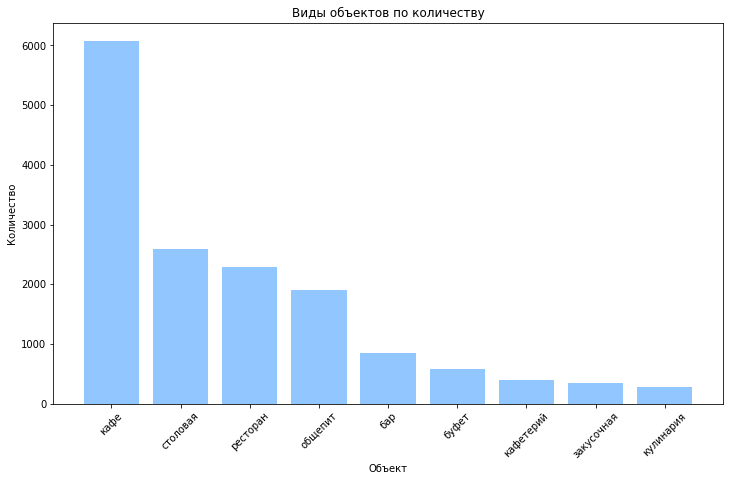

In [24]:
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(12, 7))
    plt.xticks(rotation=45)
    plt.bar(name_type['object_type'],name_type['object_name'])
    plt.title('Виды объектов по количеству')
    plt.xlabel('Объект') 
    plt.ylabel('Количество')
    plt.show()

Кафешек больше всего(6071),потом столовая(2584),ресторан(2282) и предприятия общественного питания(1898).Меньше кулинария(273),закусочная(349),кафетерий(395).

- Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [25]:
chain_type = data.groupby('chain', as_index=False ).agg({'object_type':'count'}).sort_values(by='object_type', ascending=False)
chain_type

,chain,object_type
1,нет,12320
0,да,2964


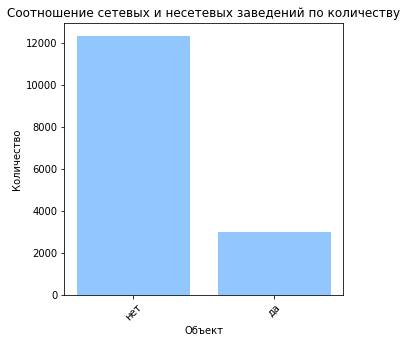

In [26]:
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(5, 5))
    plt.xticks(rotation=45)
    plt.bar(chain_type['chain'], chain_type['object_type'])
    plt.title('Cоотношение сетевых и несетевых заведений по количеству')
    plt.xlabel('Объект') 
    plt.ylabel('Количество')
    plt.show()

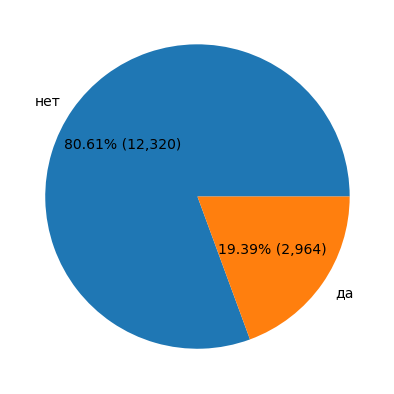

In [27]:
plt.figure(figsize=(7, 7))
plt.pie(chain_type['object_type'], labels=chain_type['chain'], autopct=lambda p : '{:.2f}% ({:,.0f})'.\
                                    format(p,p * sum(chain_type['object_type'])/100), textprops={'fontsize': 14})
plt.show()

Сетевых заведений - 2964(19,39%),а несетевых - 12320(80,61%).

- Для какого вида объекта общественного питания характерно сетевое распространение?

In [28]:
cm = sns.light_palette("blue", as_cmap=True)
data_pivot = data.pivot_table(index='object_type', values='id', columns='chain', aggfunc='count').\
                  reset_index().style.background_gradient(cmap=cm)

data_pivot

chain,object_type,да,нет
0,бар,37,818
1,буфет,11,566
2,закусочная,56,293
3,кафе,1396,4675
4,кафетерий,52,343
5,кулинария,78,195
6,общепит,788,1110
7,ресторан,543,1739
8,столовая,3,2581


Больше всего сетевых предприятий в  КАФЕ(1396),но и по несетевым они тоже на первом месте(4675).На втором месте ОБЩЕПИТ(788),на третьем  РЕСТОРАНЫ(543).

In [29]:
data_pivot = data.pivot_table(index='object_type', values='id', columns='chain', aggfunc='count').reset_index()
data_pivot['network%'] = ((data_pivot['да'] / (data_pivot['да'] + data_pivot['нет'])) * 100).round(1)
data_pivot = data_pivot.sort_values('network%', ascending = False)
data_pivot.style.background_gradient(cmap=cm)

chain,object_type,да,нет,network%
6,общепит,788,1110,41.5
5,кулинария,78,195,28.6
7,ресторан,543,1739,23.8
3,кафе,1396,4675,23
2,закусочная,56,293,16
4,кафетерий,52,343,13.2
0,бар,37,818,4.3
1,буфет,11,566,1.9
8,столовая,3,2581,0.1


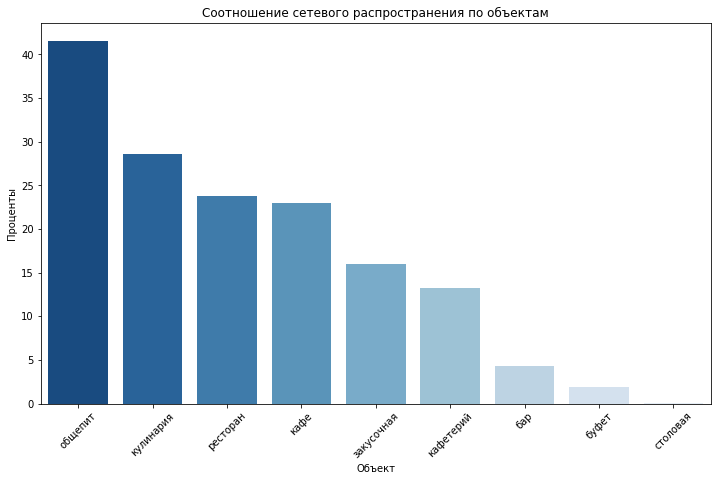

In [30]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='object_type', y='network%', data=data_pivot, palette="Blues_r")
plt.xticks(rotation=45)
ax.set_xlabel('Объект')
ax.set_ylabel('Проценты')
ax.set_title('Соотношение сетевого распространения по объектам')
plt.show()

Если смотреть в соотношении по количеству сеть-не сеть,то получается на первом месте общепит(41,5%),на втором кулинария(28,6%),на третьем ресторан(23,8%) и на четвертом кафе(23%)-которое по количеству было на первом месте.

- Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [31]:
chain_object = data.query('chain == "да"')
chain_object.head()

,id,object_name,chain,object_type,address,number
3,21894,пиццетория,да,кафе,город москва абрамцевская улица дом 1,40
6,148815,брусника,да,кафе,город москва переулок сивцев вражек дом 6/2,10
13,22579,алло пицца,да,кафе,город москва улица авиаторов дом 14,32
16,144107,суши вок,да,общепит,город москва азовская улица дом 3,7
18,58565,тануки,да,ресторан,город москва большая академическая улица дом 65,160


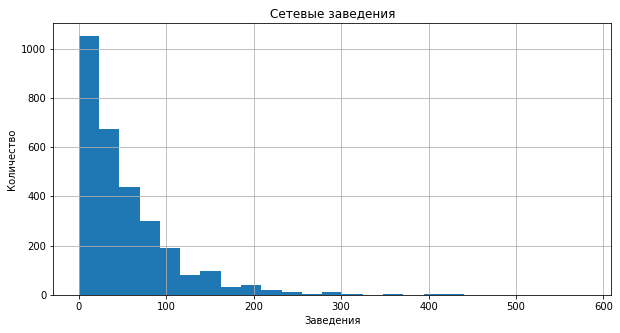

In [32]:
chain_object['number'].hist(bins=25, figsize = (10,5))
plt.title('Сетевые заведения')
plt.xlabel('Заведения')
plt.ylabel('Количество')
plt.show()

In [33]:
chain_object.describe()

,id,number
count,2964.000000,2964.000000
mean,118096.469298,52.981107
std,67521.141932,57.152817
min,838.000000,0.000000
25%,59187.000000,15.000000
50%,129967.500000,40.000000
75%,176803.500000,72.000000
max,223318.000000,580.000000


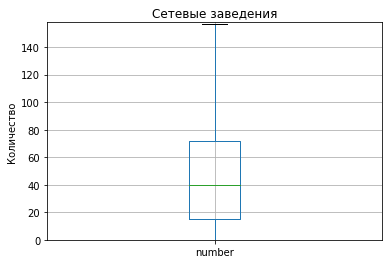

In [34]:
plt.ylim(0,158) 
chain_object.boxplot(column = 'number', showfliers = False)
plt.title('Сетевые заведения')
plt.ylabel('Количество')
plt.show()

Среднее количество мест по сетевым объектам=52,медиана=40.Пик 14-73,после 158 выбросы.Максимум 580,минимум 0.

Для сетевых заведений характерно много заведений с небольшим числом посадочных мест в каждом.

In [35]:
chain_group =  chain_object.groupby('object_name').agg({'id': 'count', 'number' : 'mean'}).\
                                                   sort_values(by = 'id', ascending = False).reset_index()
chain_group = chain_group.query('number > 1')
chain_group.head()

,object_name,id,number
0,шоколадница,157,57.184713
1,kfc,155,55.341935
2,макдоналдс,150,87.700000
3,бургер кинг,144,48.430556
4,теремок,94,25.606383


In [36]:
seats_limit = chain_group['number'].quantile(0.6)
number_of_restaurants_limit = chain_group['id'].quantile(0.6)

chain_group['category'] = pd.concat([(pd.qcut(chain_group['number'], q=[0,0.7,1], \
                          labels=['небольшое число мест', 'большое число мест'])), \
                         (pd.qcut(chain_group['id'], q=[0,0.7,1], \
                           labels=['небольшое число заведений', 'большое число заведений']))], axis='columns').\
                           apply(lambda row: (row[0], row[1]), axis = 1)

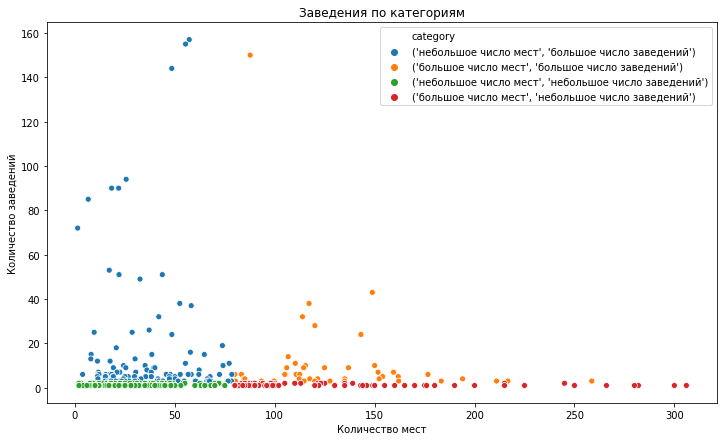

category
(большое число мест, большое число заведений)        46 
(большое число мест, небольшое число заведений)      114
(небольшое число мест, большое число заведений)      112
(небольшое число мест, небольшое число заведений)    261
Name: id, dtype: int64

In [37]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=chain_group, x="number", y="id", hue="category")
plt.title('Заведения по категориям')
plt.xlabel('Количество мест')
plt.ylabel('Количество заведений') 
plt.show()
chain_group.groupby('category')['id'].count()

- Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

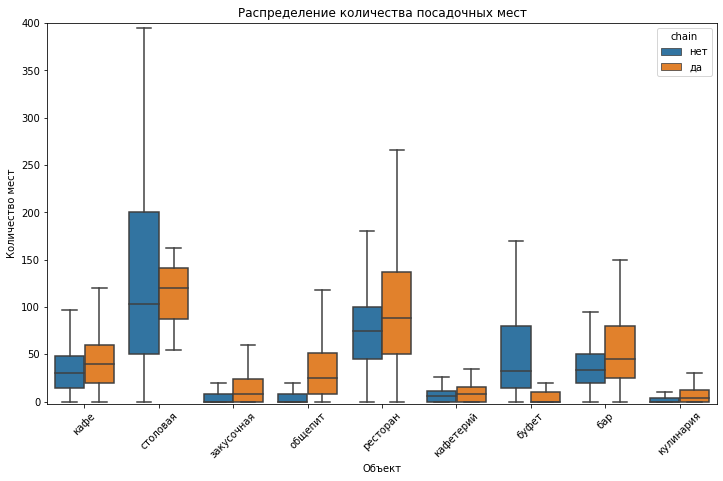

In [38]:
plt.figure(figsize=(12, 7))
plt.ylim(-2,400)
plt.xticks(rotation=45)
sns.boxplot(x="object_type", y="number", hue="chain", data=data, showfliers = False) 
plt.title('Распределение количества посадочных мест')
plt.xlabel('Объект')
plt.ylabel('Количество мест') 
plt.show()

Среди несетевых выделяются столовая,ресторан,буфет,кафе и бар.Среди сетевых выделяются ресторан,столовая,бар,кафе и общепит.

In [39]:
chain_group = data.groupby('object_type').agg({'number' : 'mean'}).sort_values(by = 'number', ascending = False).\
                                                                   reset_index().round()
chain_group

,object_type,number
0,столовая,130.0
1,ресторан,97.0
2,буфет,52.0
3,бар,44.0
4,кафе,40.0
5,общепит,21.0
6,кафетерий,9.0
7,закусочная,8.0
8,кулинария,6.0


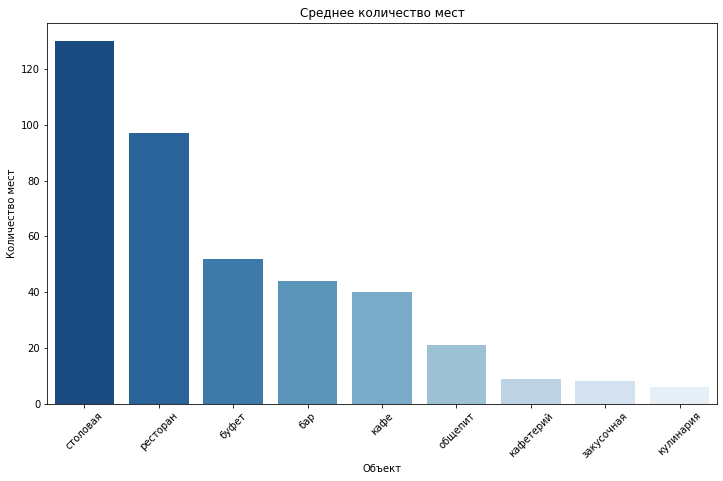

In [40]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='object_type', y='number', data=chain_group, palette="Blues_r")
plt.xticks(rotation=45)
ax.set_xlabel('Объект')
ax.set_ylabel('Количество мест')
ax.set_title('Среднее количество мест')
plt.show()

Топ 5 объектов по средним показаниям:
столовая=130;
ресторан=97;
буфет=52;
бар=44;
кафе=40.

In [41]:
chain_group_median = data.groupby(['object_type']).agg({'number': 'median'}).sort_values('number', ascending=False).\
                                                                             reset_index()
chain_group_median                    

,object_type,number
0,столовая,103
1,ресторан,80
2,бар,35
3,буфет,32
4,кафе,30
5,кафетерий,6
6,общепит,6
7,закусочная,0
8,кулинария,0


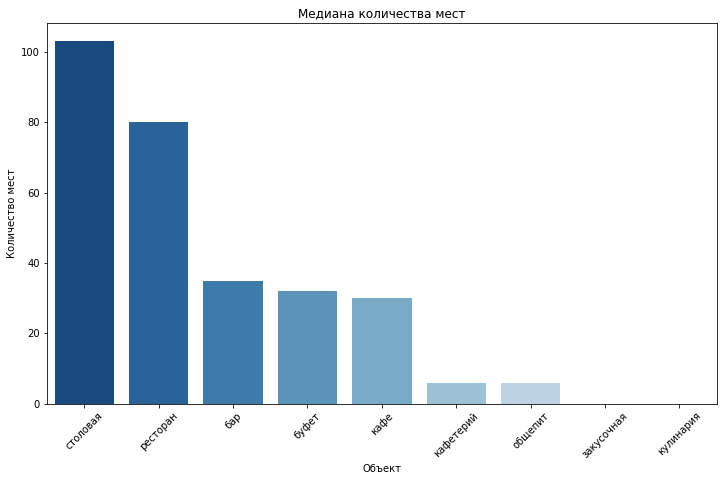

In [42]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='object_type', y='number', data=chain_group_median, palette="Blues_r")
plt.xticks(rotation=45)
ax.set_xlabel('Объект')
ax.set_ylabel('Количество мест')
ax.set_title('Медиана количества мест')
plt.show()

Топ 5 объектов по медианым показаниям:
столовая=103;
ресторан=80;
бар=35;
буфет=32;
кафе=30.

Самое большое количество мест,что по среднему,что по медиане СТОЛОВАЯ,потом идет ресторан.

- Выделите в отдельный столбец информацию об улице из столбца address .

In [43]:
data['street'] = data['address'].str.replace('город москва ', '')

data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,город москва улица егора абакумова дом 9,48,улица егора абакумова дом 9
1,77874,родник,нет,кафе,город москва улица талалихина дом 2/1 корпус 1,35,улица талалихина дом 2/1 корпус 1
2,24309,кафе академия,нет,кафе,город москва абельмановская улица дом 6,95,абельмановская улица дом 6
3,21894,пиццетория,да,кафе,город москва абрамцевская улица дом 1,40,абрамцевская улица дом 1
4,119365,кафе вишневая метель,нет,кафе,город москва абрамцевская улица дом 9 корпус 1,50,абрамцевская улица дом 9 корпус 1


In [44]:
data['street'] = data['street'].str.replace(' дом +[\w\W]+', '')
data['street'] = data['street'].str.replace(' владение +[\w\W]+', '')
data['street'] = data['street'].str.replace(' домовладение +[\w\W]+', '')
data.sample(5)

,id,object_name,chain,object_type,address,number,street
4605,28054,московское упп 13 всесоюзное общество слепых,нет,буфет,город москва люблинская улица дом 139 строение 1,32,люблинская улица
13443,194344,теремок,да,общепит,город москва святоозерская улица дом 1а,0,святоозерская улица
9615,77746,кафе родник,нет,кафе,город москва город московский 1 й микрорайон дом 5г,16,город московский 1 й микрорайон
11769,186910,ресторан osteria mario,нет,ресторан,город москва пресненская набережная дом 2,60,пресненская набережная
6463,74957,кафе макдоналдс,да,общепит,город москва мичуринский проспект дом 21а,122,мичуринский проспект


- Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [45]:
spreadsheet_id = '1CPDYDGjKCb6jGoQt9KR5WOvTspK-dHS3NUrVeqsyqJs'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [46]:
df['streetname'] = df['streetname'].str.lower()
df = df.rename(columns = {'streetname':'street'})
data_new = data.merge(df, how='left', on='street')

In [47]:
data_new.duplicated().sum()

79

In [48]:
data_new = data_new.drop_duplicates().reset_index(drop=True)
data_new.duplicated().sum()

0

In [49]:
top10_street = data.groupby('street').count().sort_values(by='object_type', ascending=False).head(10).reset_index()
list_top10 = list(top10_street['street'])
top10_street

,street,id,object_name,chain,object_type,address,number
0,проспект мира,204,204,204,204,204,204
1,профсоюзная улица,182,182,182,182,182,182
2,ленинградский проспект,172,172,172,172,172,172
3,пресненская набережная,167,167,167,167,167,167
4,варшавское шоссе,162,162,162,162,162,162
5,ленинский проспект,148,148,148,148,148,148
6,проспект вернадского,128,128,128,128,128,128
7,кутузовский проспект,114,114,114,114,114,114
8,каширское шоссе,111,111,111,111,111,111
9,кировоградская улица,108,108,108,108,108,108


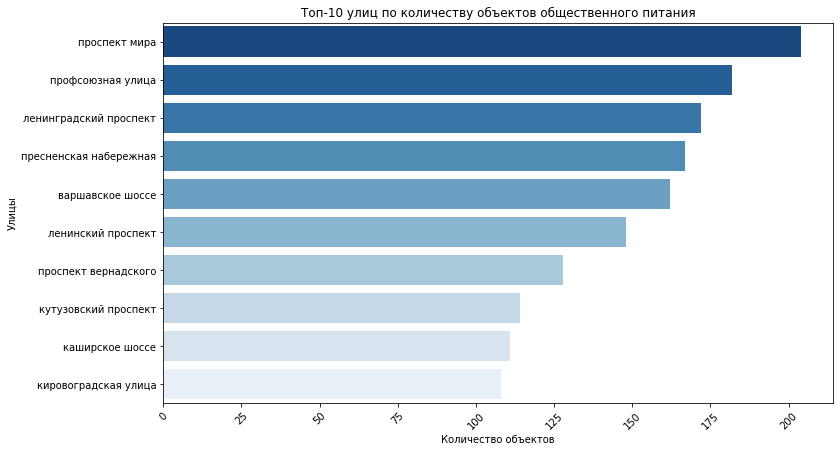

In [50]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='object_type', y='street', data=top10_street, palette="Blues_r")
plt.xticks(rotation=45)
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Улицы')
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
plt.show()

In [51]:
list_top10

['проспект мира',
 'профсоюзная улица',
 'ленинградский проспект',
 'пресненская набережная',
 'варшавское шоссе',
 'ленинский проспект',
 'проспект вернадского',
 'кутузовский проспект',
 'каширское шоссе',
 'кировоградская улица']

In [52]:
df.columns = ['street', 'areaid','okrug', 'area']
street_area = top10_street.merge(df, on='street', how='left')
street_area = street_area.drop(['id','areaid'], 1)
street_area

,street,object_name,chain,object_type,address,number,okrug,area
0,проспект мира,204,204,204,204,204,СВАО,Алексеевский район
1,проспект мира,204,204,204,204,204,СВАО,Ярославский Район
2,проспект мира,204,204,204,204,204,СВАО,Район Марьина роща
3,проспект мира,204,204,204,204,204,СВАО,Останкинский район
4,проспект мира,204,204,204,204,204,СВАО,Район Ростокино
5,проспект мира,204,204,204,204,204,СВАО,Район Свиблово
6,проспект мира,204,204,204,204,204,ЦАО,Мещанский район
7,профсоюзная улица,182,182,182,182,182,ЮЗАО,Академический район
8,профсоюзная улица,182,182,182,182,182,ЮЗАО,Район Черемушки
9,профсоюзная улица,182,182,182,182,182,ЮЗАО,Район Ясенево


1) Проспект Мира(204):

Округ - ЦАО, СВАО

Район - Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино, Ярославский(7)

Протяжённость - 8,9 км;

2) Профсоюзная улица(182):

Округ - ЮЗАО

Район - Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево(6)

Протяжённость - 9,3 км;

3) Ленинградский проспект(172):

Округ - САО

Район - Беговой, Аэропорт, Сокол, Хорошёвский(4)

Протяжённость - 5,6 км;

4) Пресненская набережная(167):

Округ - ЦАО

Район - Пресненский(1)

Протяжённость - 0,55 км;

5) Варшавское шоссе(162):

Округ - ЮАО, ЮЗАО, НАО

Район - Чертаново Центральное, Чертаново Северное, Чертаново Южное, Донской, Нагатино-Садовники, Нагорный, Северное Бутово, Южное Бутово(8)

Протяжённость - 22,5 км;

6) Ленинский проспект(148):

Округ - ЦАО, ЮАО, ЮЗАО, ЗАО

Район - Якиманка, Донской, Гагаринский, Ломоносовский, Обручевский, Тёплый Стан, Проспект Вернадского, Тропарёво-Никулино(8)

Протяжённость - 14 км;

7) Проспект Вернадского(128):

Округ - ЗАО, ЮЗАО

Район - Проспект Вернадского, Раменки, Тропарево-Никулино, Район Гагаринский, Ломоносовский район(5)

Протяжённость - 4,6 км²;

8) Кутузовский проспект(114):

Округ - ЗАО

Район - Дорогомилово, Фили-Давыдково(2)

Протяжённость - 8,3 км;

9) Каширское шоссе(111):

Округ - ЮАО

Район - Москворечье-Сабурово, Орехово-Борисово Северное, Орехово-Борисово Южное, Нагатино-Садовники(4)

Протяжённость - 10,5 км;

10) Кировоградская улица(108):

Округ - ЮАО

Район - Чертаново Северное, Чертаново Центральное, Чертаново Южное(3).

В основном топ находится на юге,юго-западе Москвы и поближе к центру.

- Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [53]:
street_1 = data.groupby('street').agg({'object_name': 'count'}).sort_values(by = 'object_name', ascending = False)
street_1 = street_1.query('object_name == 1')
street_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 722 entries, тессинский переулок to яхромская улица
Data columns (total 1 columns):
object_name    722 non-null int64
dtypes: int64(1)
memory usage: 11.3+ KB


722 заведение.

In [54]:
street_1 = street_1.merge(df, on = 'street', how = 'inner')
street_1.duplicated().sum()

0

In [55]:
street_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 427
Data columns (total 5 columns):
street         428 non-null object
object_name    428 non-null int64
areaid         428 non-null int64
okrug          428 non-null object
area           428 non-null object
dtypes: int64(2), object(3)
memory usage: 20.1+ KB


После слияния их стало 428 заведений.

Округ и район,где находится объект.

In [56]:
for okrug in street_1['okrug'].sort_values().unique():
    print(okrug)
for area in street_1['area'].sort_values().unique():
    print(area)

ВАО
ЗАО
Зеленоград
САО
СВАО
СЗАО
ЦАО
ЮАО
ЮВАО
ЮЗАО
Алексеевский район
Алтуфьевский район
Бабушкинский район
Басманный район
Бескудниковский Район
Бутырский район
Войковский Район
Головинский район
Даниловский район
Дмитровский район
Донской район
Красносельский район
Лосиноостровский район
Мещанский район
Можайский Район
Молжаниновский район
Нагорный район
Нижегородский район
Обручевский район
Останкинский район
Пресненский район
Район Арбат
Район Аэропорт
Район Беговой
Район Бирюлево Восточное
Район Богородское
Район Внуково
Район Восточный
Район Выхино-Жулебино
Район Гольяново
Район Дорогомилово
Район Замоскворечье
Район Западное Дегунино
Район Зюзино
Район Ивановское
Район Измайлово
Район Коньково
Район Коптево
Район Косино-Ухтомский
Район Котловка
Район Крюково
Район Кузьминки
Район Кунцево
Район Куркино
Район Левобережный
Район Лефортово
Район Лианозово
Район Люблино
Район Марфино
Район Марьина роща
Район Марьино
Район Матушкино-Савелки
Район Метрогородок
Район Митино
Район Москво

In [57]:
street_1_area = street_1.groupby('area')['street'].count()
street_1_area.sort_values(ascending=False).head(10)

area
Таганский район        25
Басманный район        20
Пресненский район      20
Район Хамовники        19
Тверской район         17
Район Арбат            17
Мещанский район        14
Район Замоскворечье    9 
Район Лефортово        9 
Район Сокольники       8 
Name: street, dtype: int64

Больше всего объектов по районам:

Таганский район-25;

Басманный район-20;

Пресненский район-20;

Район Хамовники-19;

Тверской район-17;

Район Арбат-17;

Мещанский район-14;

Район Замоскворечье-9;

Район Лефортово-9;

Район Сокольники-8.

In [58]:
street_1_okrug = street_1.groupby('okrug')['street'].count()
street_1_okrug.sort_values(ascending=False).head(10)

okrug
ЦАО           154
СВАО          47 
САО           41 
ЮВАО          40 
ВАО           40 
ЗАО           33 
ЮЗАО          25 
СЗАО          25 
ЮАО           21 
Зеленоград    2  
Name: street, dtype: int64

Больше всего объектов по округам:

ЦАО-154;

СВАО-47;

САО-41;

ЮВАО-40;

ВАО-40;

ЗАО-33;

ЮЗАО-25;

СЗАО-25;

ЮАО-21; 

Зеленоград-2.

- Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [59]:
list_top10

['проспект мира',
 'профсоюзная улица',
 'ленинградский проспект',
 'пресненская набережная',
 'варшавское шоссе',
 'ленинский проспект',
 'проспект вернадского',
 'кутузовский проспект',
 'каширское шоссе',
 'кировоградская улица']

In [60]:
top10_street = data.query('street in @list_top10')
top10_street = top10_street.sort_values(by='number', ascending=False)

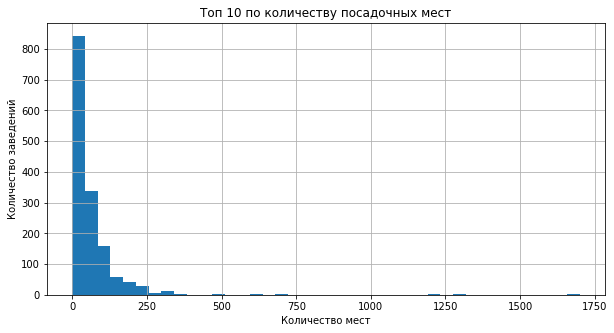

In [61]:
top10_street['number'].hist(bins=40, figsize = (10,5))
plt.title('Топ 10 по количеству посадочных мест')
plt.xlabel('Количество мест')
plt.ylabel('Количество заведений')
plt.show()

In [62]:
top10_street['number'].describe()

count    1496.000000
mean     58.232620  
std      90.213048  
min      0.000000   
25%      12.000000  
50%      40.000000  
75%      75.000000  
max      1700.000000
Name: number, dtype: float64

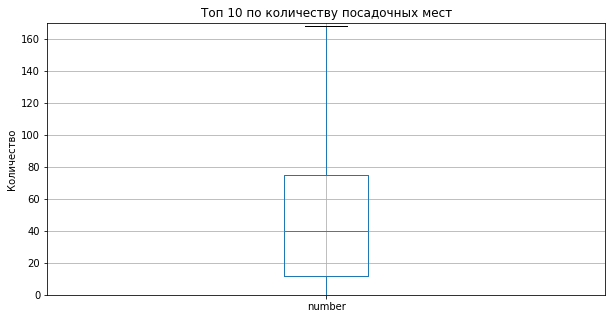

In [63]:
plt.figure(figsize=(10, 5))
plt.ylim(0,170) 
top10_street.boxplot(column = 'number', showfliers = False)
plt.title('Топ 10 по количеству посадочных мест')
plt.ylabel('Количество')
plt.show()

Среднее количество мест по всем районам 58,медиана 40,максимальное 1700,минимальное 0.Пик 11-76,после 170 выбросы.

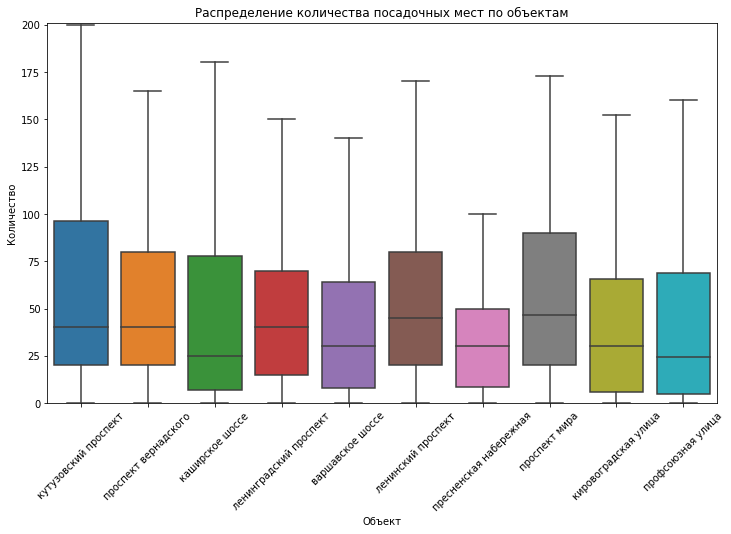

In [64]:
plt.figure(figsize=(12, 7))
plt.ylim(0,201)
plt.xticks(rotation=45)
sns.boxplot(x='street', y='number', data=top10_street, showfliers = False) 
plt.title('Распределение количества посадочных мест по объектам')
plt.xlabel('Объект')
plt.ylabel('Количество') 
plt.show()

Большее количество мест на Кутузовском проспекте,Ленинском проспекте и Проспекте мира.Выделяется пресненская набережная с меньшим количеством посадочных мест среди топа.

В основном посадочных мест по 40. Пики лежат в промежутках от 5-98.

## Общий вывод,дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

- Кафешек больше всего(6071),потом столовая(2584),ресторан(2282) и предприятия общественного питания(1898).Меньше кулинария(273),закусочная(349),кафетерий(395).

Среди несетевых выделяются столовая,ресторан,буфет,кафе и бар.
Среди сетевых выделяются ресторан,столовая,бар,кафе и общепит.

- Больше всего сетевых предприятий:

КАФЕ(1396)

ОБЩЕПИТ(791)

РЕСТОРАНЫ(544).

- Больше всего несетевых предприятий:

КАФЕ(4703)

СТОЛОВАЯ(2584)

РЕСТОРАН(1741).	

- Если смотреть в соотношении по количеству сеть-не сеть,то получается на первом месте общепит(41,5%),на втором кулинария(28,6%),на третьем ресторан(23,8%) и на четвертом кафе(23%)-которое по количеству было на первом месте.

- Среднее количество мест по сетевым объектам=52,медиана=40.Пик 14-73,после 160 выбросы.Максимум 580,минимум 0.


- Среднее количество мест:

    большое число мест, большое число заведений 46

    большое число мест, небольшое число заведений 114

    небольшое число мест, большое число заведений 112

    небольшое число мест, небольшое число заведений 261


Топ 5 объектов по средним показаниям: столовая=130; ресторан=97; буфет=52; бар=44; кафе=40

Топ 5 объектов по медианым показаниям: столовая=103; ресторан=80; бар=35; буфет=32; кафе=30.

Самое большое количество мест,что по среднему,что по медиане СТОЛОВАЯ,потом идет ресторан.

- Топ 10 по количеству сетевых заведений

1) Проспект Мира(204):

Округ - ЦАО, СВАО

Район - Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино, Ярославский(7)

Протяжённость - 8,9 км;

2) Профсоюзная улица(182):

Округ - ЮЗАО

Район - Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево(6)

Протяжённость - 9,3 км;

3) Ленинградский проспект(172):

Округ - САО

Район - Беговой, Аэропорт, Сокол, Хорошёвский(4)

Протяжённость - 5,6 км;

4) Пресненская набережная(167):

Округ - ЦАО

Район - Пресненский(1)

Протяжённость - 0,55 км;

5) Варшавское шоссе(162):

Округ - ЮАО, ЮЗАО, НАО

Район - Чертаново Центральное, Чертаново Северное, Чертаново Южное, Донской, Нагатино-Садовники, Нагорный, Северное Бутово, Южное Бутово(8)

Протяжённость - 22,5 км;

6) Ленинский проспект(148):

Округ - ЦАО, ЮАО, ЮЗАО, ЗАО

Район - Якиманка, Донской, Гагаринский, Ломоносовский, Обручевский, Тёплый Стан, Проспект Вернадского, Тропарёво-Никулино(8)

Протяжённость - 14 км;

7) Проспект Вернадского(128):

Округ - ЗАО, ЮЗАО

Район - Проспект Вернадского, Раменки, Тропарево-Никулино, Район Гагаринский, Ломоносовский район(5)

Протяжённость - 4,6 км²;

8) Кутузовский проспект(114):

Округ - ЗАО

Район - Дорогомилово, Фили-Давыдково(2)

Протяжённость - 8,3 км;

9) Каширское шоссе(111):

Округ - ЮАО

Район - Москворечье-Сабурово, Орехово-Борисово Северное, Орехово-Борисово Южное, Нагатино-Садовники(4)

Протяжённость - 10,5 км;

10) Кировоградская улица(108):

Округ - ЮАО

Район - Чертаново Северное, Чертаново Центральное, Чертаново Южное(3).

В основном топ находится на юге,юго-западе Москвы и поближе к центру.

- Топ 10 по количеству несетевых заведений:

Таганский район-25;

Басманный район-20;

Пресненский район-20;

Район Хамовники-19;

Тверской район-17;

Район Арбат-17;

Мещанский район-14;

Район Замоскворечье-9;

Район Лефортово-9;

Район Сокольники-8.

- Больше всего несетевых заведений по округам:

ЦАО-154;

СВАО-47;

САО-41;

ЮВАО-40;

ВАО-40;

ЗАО-33;

ЮЗАО-25;

СЗАО-25;

ЮАО-21;

Зеленоград-2.

Надо открыть заведение типа кафе с количеством посадочных мест небольше 50 в центральной части города(они там популярны)Проспект Мира,Профсоюзная улица.
Думаю идея с роботами хороша для старта,людям нравится что-то новое.


## Презентация.

https://docs.yandex.ru/docs/view?url=ya-disk%3A%2F%2F%2Fdisk%2FЗагрузки%2Fпрезентация%2FPresentation.pdf&name=Presentation.pdf&uid=548368753